# Churn modeling:(This is a segmentation model that is used to segment users into two or more categories)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

# **Data preprocessing**

In [5]:
dataset=pd.read_csv('./Churn_Modelling.csv')
x=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values


In [6]:
#encoding categorical variables
#label encoding gender

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])


In [7]:
#one hot encoding country fields
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [8]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
#scaling the training set
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

# **Building the ANN**

In [10]:
#intializing the ANN
ann=tf.keras.models.Sequential()

In [11]:
#Adding the input and first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [12]:
#adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [13]:
#adding an output layer
#for multivariate classification use softmax as acticvation function

#use sigmoid as activation function for bivariarte/binary output
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# **Training the ANN**

In [14]:
!pip install tensor-dash

  Using cached tensor_dash-1.8.1-py3-none-any.whl (8.8 kB)


In [15]:
#compiling the ANN
#this is for bivariate classification
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#use this is for multivariate classification use categorical_crossentropy loss


In [16]:
from tensordash.tensordash import Tensordash
histories=Tensordash(
    ModelName='ann Clasification (chur segmentation)',
    email='dumkaabhipray@gmail.com',
    password='kamalanita1@'
)


In [17]:
#training the ANN
try:
  ann.fit(x_train,y_train,batch_size=32,epochs=100,callbacks=[histories])
except Exception as e:
  print(e)
  histories.sendCrash()

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.5933 - accuracy: 0.6981
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4573 - accuracy: 0.8026
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4224 - accuracy: 0.8158
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4017 - accuracy: 0.8324
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3855 - accuracy: 0.8454
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3729 - accuracy: 0.8520
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3637 - accuracy: 0.8535
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3574 - accuracy: 0.8558
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3528 - accuracy: 0.8556
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3494 - accura

250/250 [==============================] - 1s 4ms/step - loss: 0.3314 - accuracy: 0.8635
Epoch 79/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3318 - accuracy: 0.8651
Epoch 80/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3314 - accuracy: 0.8631
Epoch 81/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3312 - accuracy: 0.8629
Epoch 82/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3312 - accuracy: 0.8627
Epoch 83/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3312 - accuracy: 0.8636
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3310 - accuracy: 0.8635
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.8634
Epoch 86/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3313 - accuracy: 0.8636
Epoch 87/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3311 - accuracy: 

# **Making the predictions on the trained model**

In [18]:
#predicting test set results
y_pred=ann.predict(x_test)#this will simply return probablity
y_pred=(y_pred>0.5)#we need to convert probablity to some solid value based on some threshold value
res=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(res)

63/63 [==============================] - 0s 699us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 1]
 [0 1]]


D:\ajgar\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\ajgar\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

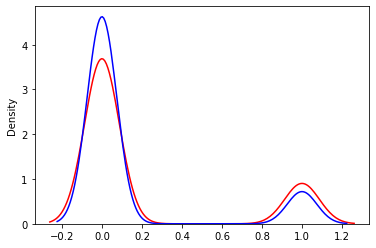

In [19]:
#visualizing the results
import seaborn as sns
ax1=sns.distplot(y_test,hist=False,color="r",label="actual value")
sns.distplot(y_pred,hist=False,color="b",label="predicted values",ax=ax1)

In [20]:
#building the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1530   77]
 [ 201  192]]


0.861

#Cross validating the model using k-fold cross validation

In [21]:
#need to split data into different sets first
#need to handle the crashed iteration
dataSets=[]
accuracies=[]
for val in range(1,10):
  print(f'this is the {val}th dataset split results')
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=val+7)
  try:
    history=ann.fit(np.asarray(x_train).astype(np.float32), np.asarray(y_train).astype(np.float32),batch_size=32,epochs=100,callbacks=[histories])
    accuracies.append(history)
  except Exception as e:
    print(e)
  histories.sendCrash()

this is the 1th dataset split results
Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 80.4091 - accuracy: 0.7453
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 21.5563 - accuracy: 0.7492
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 16.2529 - accuracy: 0.7525
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 19.3080 - accuracy: 0.7539
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 13.1209 - accuracy: 0.7596
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 11.7739 - accuracy: 0.7545
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 7.9124 - accuracy: 0.7619
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 10.0610 - accuracy: 0.7557
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 8.3756 - accuracy: 0.7617
Epoch 10/100
235/235 [========================

Epoch 81/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5090 - accuracy: 0.7944
Epoch 82/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5090 - accuracy: 0.7944
Epoch 83/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5084 - accuracy: 0.7947
Epoch 84/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5081 - accuracy: 0.7944
Epoch 85/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5080 - accuracy: 0.7945
Epoch 86/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5081 - accuracy: 0.7945
Epoch 87/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5085 - accuracy: 0.7945
Epoch 88/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5084 - accuracy: 0.7945
Epoch 89/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5079 - accuracy: 0.7947
Epoch 90/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5078

235/235 [==============================] - 1s 4ms/step - loss: 0.5046 - accuracy: 0.7971
Epoch 62/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5046 - accuracy: 0.7971
Epoch 63/100
235/235 [==============================] - 1s 5ms/step - loss: 0.5046 - accuracy: 0.7971
Epoch 64/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5045 - accuracy: 0.7971
Epoch 65/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5046 - accuracy: 0.7971
Epoch 66/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5046 - accuracy: 0.7971
Epoch 67/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5046 - accuracy: 0.7971
Epoch 68/100
235/235 [==============================] - 1s 5ms/step - loss: 0.5045 - accuracy: 0.7971
Epoch 69/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5046 - accuracy: 0.7971
Epoch 70/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5046 - accuracy: 

235/235 [==============================] - 1s 4ms/step - loss: 0.5049 - accuracy: 0.7969
Epoch 42/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5048 - accuracy: 0.7969
Epoch 43/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5048 - accuracy: 0.7969
Epoch 44/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5047 - accuracy: 0.7969
Epoch 45/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5048 - accuracy: 0.7969
Epoch 46/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5048 - accuracy: 0.7969
Epoch 47/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5048 - accuracy: 0.7969
Epoch 48/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5047 - accuracy: 0.7969
Epoch 49/100
235/235 [==============================] - 1s 5ms/step - loss: 0.5048 - accuracy: 0.7969
Epoch 50/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5046 - accuracy: 

235/235 [==============================] - 1s 5ms/step - loss: 0.5039 - accuracy: 0.7976
Epoch 22/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.7976
Epoch 23/100
235/235 [==============================] - 1s 5ms/step - loss: 0.5040 - accuracy: 0.7976
Epoch 24/100
235/235 [==============================] - 1s 5ms/step - loss: 0.5039 - accuracy: 0.7976
Epoch 25/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5040 - accuracy: 0.7976
Epoch 26/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5038 - accuracy: 0.7976
Epoch 27/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5040 - accuracy: 0.7976
Epoch 28/100
235/235 [==============================] - 1s 6ms/step - loss: 0.5038 - accuracy: 0.7976
Epoch 29/100
235/235 [==============================] - 1s 5ms/step - loss: 0.5038 - accuracy: 0.7976
Epoch 30/100
235/235 [==============================] - 1s 5ms/step - loss: 0.5038 - accuracy: 

235/235 [==============================] - 1s 4ms/step - loss: 0.4969 - accuracy: 0.8025
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.8025
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.8025
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.8025
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.8025
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4970 - accuracy: 0.8025
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.8025
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.8025
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.8025
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.8025
E

235/235 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.8025
Epoch 82/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.8025
Epoch 83/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.8025
Epoch 84/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.8025
Epoch 85/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.8025
Epoch 86/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.8025
Epoch 87/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.8025
Epoch 88/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.8025
Epoch 89/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4971 - accuracy: 0.8025
Epoch 90/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 

235/235 [==============================] - 1s 4ms/step - loss: 0.5043 - accuracy: 0.7972
Epoch 62/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5045 - accuracy: 0.7972
Epoch 63/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5044 - accuracy: 0.7972
Epoch 64/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5044 - accuracy: 0.7972
Epoch 65/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5043 - accuracy: 0.7972
Epoch 66/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5043 - accuracy: 0.7972
Epoch 67/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5044 - accuracy: 0.7972
Epoch 68/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5044 - accuracy: 0.7972
Epoch 69/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5044 - accuracy: 0.7972
Epoch 70/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5044 - accuracy: 

235/235 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.7976
Epoch 42/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.7976
Epoch 43/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.7976
Epoch 44/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5038 - accuracy: 0.7976
Epoch 45/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.7976
Epoch 46/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5038 - accuracy: 0.7976
Epoch 47/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5038 - accuracy: 0.7976
Epoch 48/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.7976
Epoch 49/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.7976
Epoch 50/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 

235/235 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7957
Epoch 22/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7957
Epoch 23/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5066 - accuracy: 0.7957
Epoch 24/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7957
Epoch 25/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7957
Epoch 26/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7957
Epoch 27/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7957
Epoch 28/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7957
Epoch 29/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7957
Epoch 30/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 

235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5041 - accuracy: 0.7973
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5043 - accuracy: 0.7973
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
E

235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 82/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 83/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 84/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5043 - accuracy: 0.7973
Epoch 85/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 86/100
235/235 [==============================] - 1s 5ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 87/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 88/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 89/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.7973
Epoch 90/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 

In [23]:
def createDataFrames():
  accuracy_Data=[]
  loss_Data=[]
  for history in accuracies:
    accuracy_arr=[]
    accuracy_arr.append(sum(history.history['accuracy']) / len(history.history['accuracy']))
    loss_arr=[]
    loss_arr.append(sum(history.history['loss']) / len(history.history['loss']))
    for accuracy_val, loss_val in zip(history.history['accuracy'],history.history['loss']):
      accuracy_arr.append(accuracy_val)
      loss_arr.append(loss_val)
    
    accuracy_Data.append(accuracy_arr)
    loss_Data.append(loss_arr)
  #creating dataframes from these values
  columns=['mean']
  for i in range(1,101):
    columns.append(f'Epoch{i}')
  index=['CV1','CV2','CV3','CV4','CV5','CV6','CV7','CV8','CV9']

  #this is the dataframe for accuracies
  accuracy_DF = pd.DataFrame(data=accuracy_Data,index=index,columns=columns)
  accuracy_DF = accuracy_DF.sort_values(by=['mean'],ascending=False)
  #this is the dataframe for losses
  loss_DF = pd.DataFrame(data=loss_Data,index=index,columns=columns)
  loss_DF = loss_DF.sort_values(by=['mean'],ascending=False)

  return {'accuracies':accuracy_DF,'losses':loss_DF}

dfs=createDataFrames()

In [24]:
#this is the accuracy dataframe
print(dfs['accuracies'])

         mean    Epoch1    Epoch2    Epoch3    Epoch4    Epoch5    Epoch6  \
CV5  0.802533  0.802533  0.802533  0.802533  0.802533  0.802533  0.802533   
CV4  0.797600  0.797600  0.797600  0.797600  0.797600  0.797600  0.797600   
CV7  0.797600  0.797600  0.797600  0.797600  0.797600  0.797600  0.797600   
CV9  0.797333  0.797333  0.797333  0.797333  0.797333  0.797333  0.797333   
CV6  0.797200  0.797200  0.797200  0.797200  0.797200  0.797200  0.797200   
CV2  0.797067  0.797067  0.797067  0.797067  0.797067  0.797067  0.797067   
CV3  0.796933  0.796933  0.796933  0.796933  0.796933  0.796933  0.796933   
CV8  0.795733  0.795733  0.795733  0.795733  0.795733  0.795733  0.795733   
CV1  0.781556  0.745333  0.749200  0.752533  0.753867  0.759600  0.754533   

       Epoch7    Epoch8    Epoch9  ...   Epoch91   Epoch92   Epoch93  \
CV5  0.802533  0.802533  0.802533  ...  0.802533  0.802533  0.802533   
CV4  0.797600  0.797600  0.797600  ...  0.797600  0.797600  0.797600   
CV7  0.797600

In [25]:
#this is the loss dataframe
print(dfs['losses'])

         mean     Epoch1     Epoch2     Epoch3     Epoch4     Epoch5  \
CV1  3.557132  80.409149  21.556335  16.252880  19.308025  13.120914   
CV8  0.506406   0.506328   0.506416   0.506378   0.506453   0.506412   
CV3  0.504791   0.504745   0.504818   0.504806   0.504792   0.504657   
CV2  0.504597   0.504614   0.504557   0.504587   0.504556   0.504526   
CV6  0.504401   0.504435   0.504432   0.504485   0.504372   0.504395   
CV9  0.504215   0.504216   0.504229   0.504230   0.504237   0.504223   
CV4  0.503873   0.503908   0.503912   0.503931   0.503868   0.503790   
CV7  0.503856   0.503895   0.503842   0.503866   0.503842   0.503820   
CV5  0.497031   0.496929   0.497024   0.497062   0.497081   0.497055   

        Epoch6    Epoch7     Epoch8    Epoch9  ...   Epoch91   Epoch92  \
CV1  11.773885  7.912387  10.060967  8.375605  ...  0.507777  0.507813   
CV8   0.506408  0.506395   0.506416  0.506250  ...  0.506454  0.506427   
CV3   0.504695  0.504773   0.504787  0.504858  ...  0.504

In [26]:
print(f'This is the mean accuracy of the model after applying 10 cross validations {dfs["accuracies"]["mean"].mean()}')

This is the mean accuracy of the model after applying 10 cross validations 0.7959506693151261


In [27]:
print(f'This is the mean loss of the model after applying 10 cross validations {dfs["losses"]["mean"].mean()}')

This is the mean loss of the model after applying 10 cross validations 0.8429224678542879


In [30]:
#processing the dataset to get a mapping for the categorical values
#this will keep a track of all the encodings that we will be using to preprocess the data that will be fed to the trained model for predictions
preProcess_dataset=pd.read_csv('./Churn_Modelling.csv').iloc[:,4:6].values
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
Gender_unique = np.unique(preProcess_dataset[:,1])
Country_unique = np.unique(preProcess_dataset[:,0])


In [31]:
genderDict={}
for val1,val2 in zip(Gender_unique,le.fit_transform(Gender_unique)):
  genderDict[val1]=val2

In [32]:
countryDict={}
ct1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
for val1,val2 in zip(preProcess_dataset[:,0],np.array(ct1.fit_transform(preProcess_dataset))):
  countryDict[val1]=val2[:-1]

print(countryDict)

{'France': array([1.0, 0.0, 0.0], dtype=object), 'Spain': array([0.0, 0.0, 1.0], dtype=object), 'Germany': array([0.0, 1.0, 0.0], dtype=object)}


In [ ]:
#writing a function that taken in an input and then gives an output based on the trained model
#in these functions need to apply inverse transformation to the input values to fit model requirements

#pass in the values and use the trained model to predict the results
#using names parameters here
def predictResults(
    RowNumber:int,CustomeId:int,Surname:str,
    CreditScore:int,Geography:str,Gender:'str',
    Age:int,Tenure:int,Balance:float,NumOfProducts:int,
    HasCard:int,IsActiveMember:int,EstimatedSalary:float,):
  featureArr=np.array([CreditScore,countryDict[Geography][0],countryDict[Geography][1],countryDict[Geography][2],genderDict[Gender],
    Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,EstimatedSalary])
  features=st.transform([[CreditScore,countryDict[Geography][0],countryDict[Geography][1],countryDict[Geography][2],genderDict[Gender],
    Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,EstimatedSalary]])
  if ann.predict(features)>0.5:
    return 'will'
  else:
    return 'will not'


result=predictResults(1,15634602	,'Hargrave'	,619,	'France',	'Female'	,42,	2,	0,	1,	1,	1,	101348.88)
print(f'the user {result} leave the firm')